# Visualising complex functions

Consider a "normal" plot of $\sin(t)$:

In [23]:
import sympy
sympy.init_printing()

%matplotlib inline

In [24]:
t = sympy.Symbol('t')

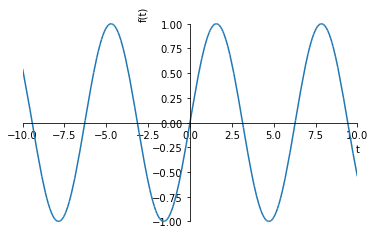

In [25]:
sympy.plot(sympy.sin(t))

This allows us to see exactly what the of $\sin(t)$ is for every value of $t$. To do this, we need two dimensions: one for the value of $t$ and one for $\sin(t)$.

If we want to plot a function of two variables we start needing three dimensions. The following plot shows a "fake" 3d plot. It's fake because in fact there are only two dimensions available on your computer screen. So we're already in a bit of trouble when trying to visualise the relationships represented by higher dimensional functions.

In [26]:
f2 = sympy.sin(x) + sympy.cos(y)

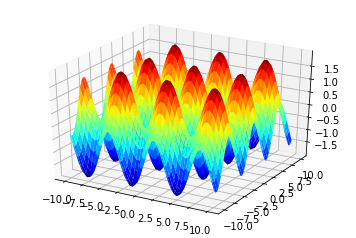

In [27]:
sympy.plotting.plot3d(f2)

We can make up for some of this lack by using colors to represent another axis.

In [29]:
import numpy
import matplotlib.pyplot as plt

In [30]:
f2numeric = sympy.lambdify((x, y), f2, 'numpy')

In [34]:
xx, yy = numpy.mgrid[-10:10:0.1, -10:10:0.1]

In [35]:
zz = f2numeric(xx, yy)

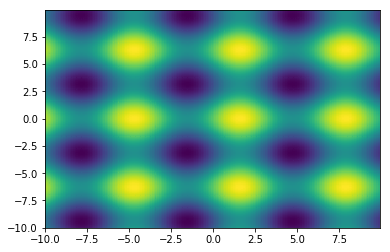

In [36]:
plt.pcolor(xx, yy, zz)

For transfer functions, we have an even bigger challenge, because we have two input variables (the real and imaginary part of $s$) and two output variables (the real and imaginary part of $G(s)$). One solution to the problem is to use colors for $\angle G(s)$ and brightness for $|G(s)|$. This is known as [domain colouring](https://en.wikipedia.org/wiki/Domain_coloring) and is supplied by `sympy.mpmath.cplot`.

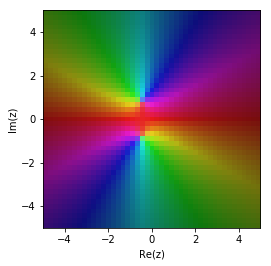

In [55]:
s = sympy.Symbol('s')

G = 1/(s**2 + s + 1)
Gnumeric = sympy.lambdify(s, G)
sympy.mpmath.cplot(Gnumeric)

Another solution is to plot the image of $G(s)$ as $s$ goes through a particular path. We will speak more of this when we cover the frequency domain, but have a look at this example. We generate values of $s$ in a circle of radius 1 around the origin, then plot $G(s)$ for all these $s$ values. This is known as the image of $G(s)$ for these values of $s$.

In [66]:
theta = numpy.linspace(0, 2*numpy.pi)  # angles around the circle
s = 0.5*(numpy.cos(theta) + numpy.sin(theta)*1j) # The circle with diameter 0.5
Gs = Gnumeric(s)

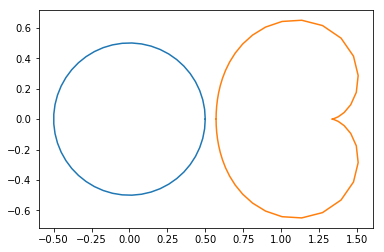

In [67]:
plt.plot(s.real, s.imag)
plt.plot(Gs.real, Gs.imag)
plt.axis('equal');